# PRCP-1000 – Portuguese Bank Marketing Campaign Analysis

## 1. Business Understanding

### Objective: The goal of this project is to analyze a Portuguese bank’s marketing campaign data and build a predictive model that helps the marketing team identify customers who are more likely to subscribe to a term deposit.

### Business Impact: Accurately identifying potential subscribers allows the bank to:

### -Reduce marketing costs

### -Improve campaign efficiency

### -Increase conversion rates

## 2. Data Understanding

### 2.1 Dataset Overview

### -Dataset contains information on direct phone call marketing campaigns

### -Time period: May 2008 – November 2010

### -Target variable: y (whether the client subscribed to a term deposit)

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("bank-additional-full.csv", sep=';')

In [2]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## 2.2 Data Cleaning:

In [7]:
df['pdays'] = df['pdays'].replace(999, -1)

In [8]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(12)

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

np.int64(0)

## Observatiion

### -Handled the pdays column by replacing the placeholder value 999 (meaning never contacted) with -1.

### -Checked for missing values (found none).

### -Identified and dropped 12 duplicate rows.

## 2.3 Target Variable Distribution

In [12]:
df['y'].value_counts()

y
no     36537
yes     4639
Name: count, dtype: int64

In [13]:
df['y'].value_counts(normalize=True) * 100

y
no     88.733728
yes    11.266272
Name: proportion, dtype: float64

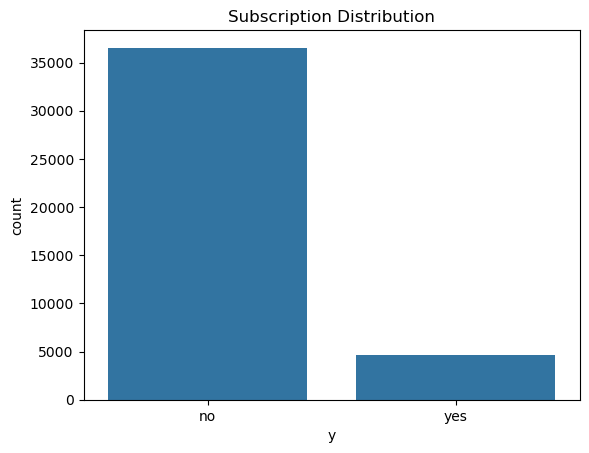

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='y', data=df)
plt.title("Subscription Distribution")
plt.show()

## Observation:

### -The dataset is highly imbalanced

### -Only ~11–12% of customers subscribed to the term deposit

### -Data is imbalance

# 3. Exploratory Data Analysis (EDA)

## 3.1 Categorical Features vs Target

## Job vs Subscription

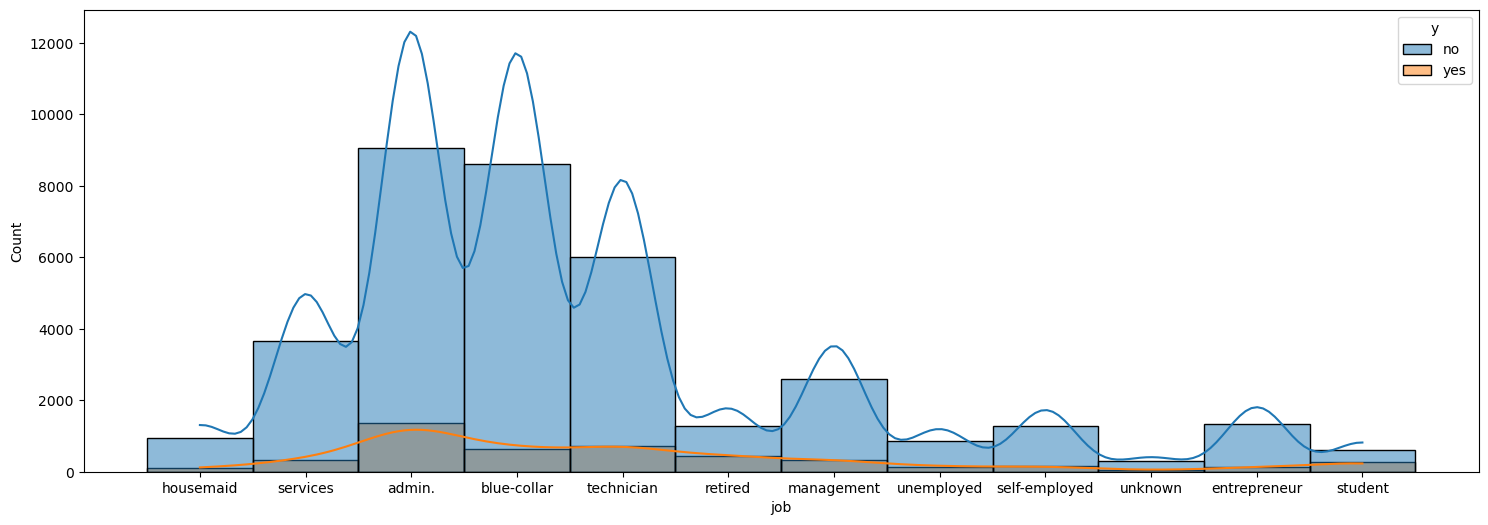

In [15]:
plt.figure(figsize=(18,6))
sns.histplot(data=df, x='job', hue='y', bins=30, kde=True)
plt.show()

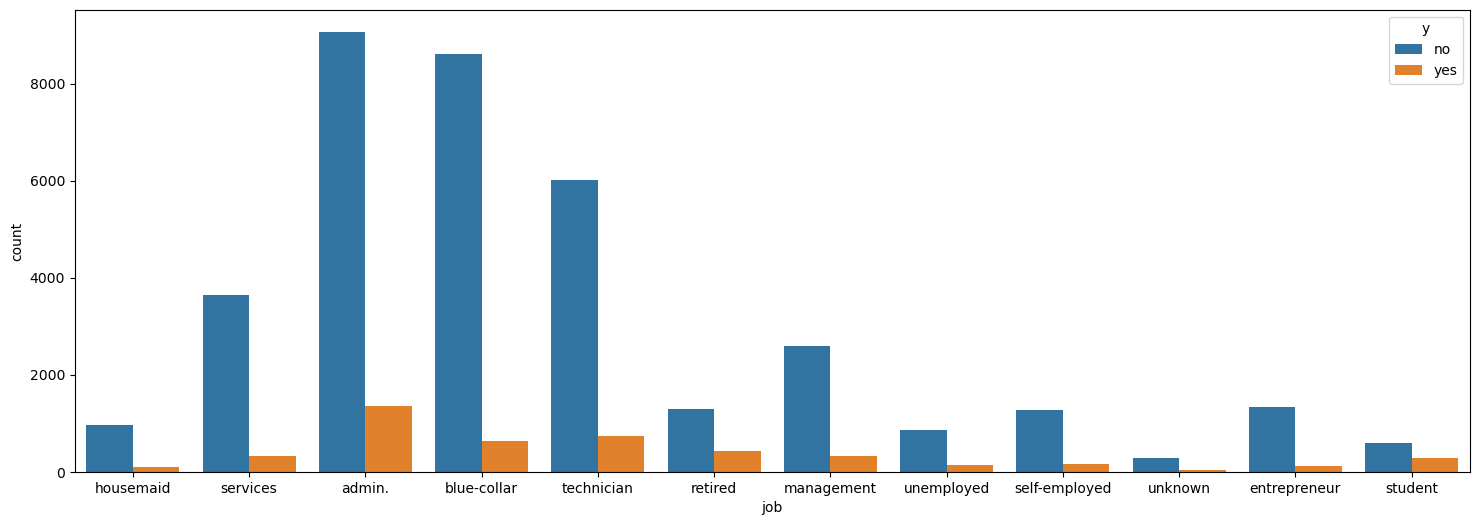

In [16]:
plt.figure(figsize=(18,6))
sns.countplot(x='job', hue='y', data=df)
plt.show()

## Observation:

### Retired and student customers show a higher subscription rate

### Blue-collar and services segments show lower conversion

## Contact Type vs Subscription

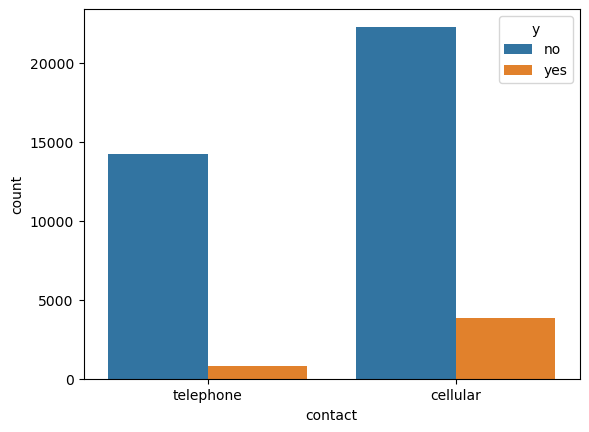

In [17]:
sns.countplot(x='contact', hue='y', data =df)
plt.show()

## Observation:

### Customers contacted via cellular are more likely to subscribe than those contacted via telephone

## Call duration vs Subscription

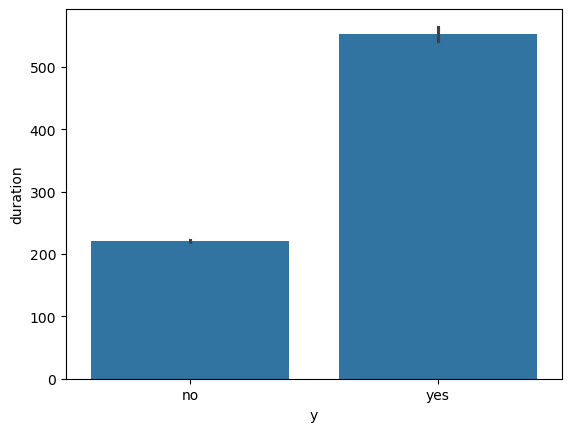

In [18]:
sns.barplot(x='y', y='duration', data=df)
plt.show()

## Previous Campaign Outcome vs Subscription

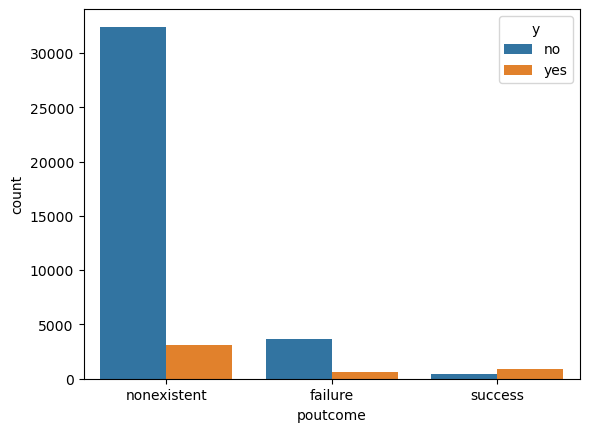

In [19]:
sns.countplot(x='poutcome', hue='y', data=df)
plt.show()

## Observation:

### Customers with a successful previous campaign outcome have a significantly higher probability of subscribing

## 3.2 Numerical Features vs Target

## Age vs Subscription

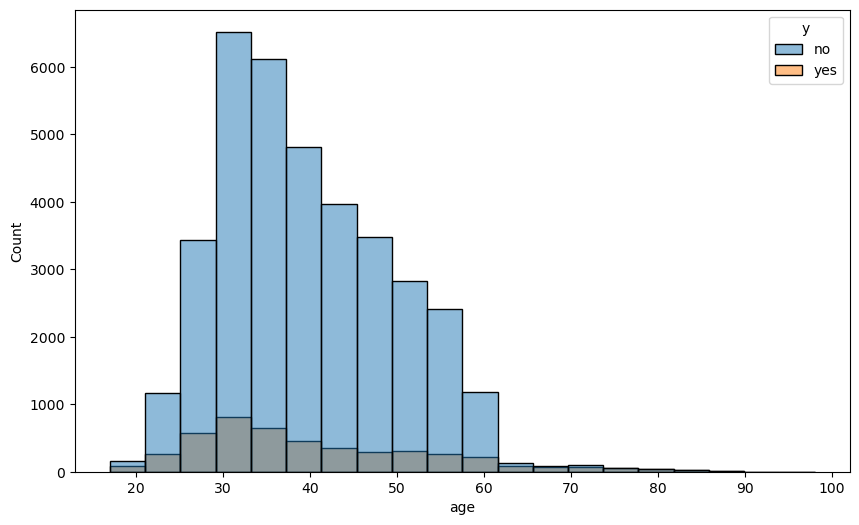

In [20]:
plt.figure(figsize=(10,6))
sns.histplot(x='age', hue='y', bins=20, data=df)
plt.show()

## Observation: 
    Age group which tends to subscribe are young ones.

## 3.3 Data Leakage Handling

In [21]:
df = df.drop('duration', axis=1)

### The duration feature represents the call duration and is not available before the call is made.
### Including this feature would cause data leakage and produce unrealistic model performance.

# 4. Data Preprocessing

### 4.1 Target Encoding

In [22]:
df['y'] = df['y'].map({'no': 0, 'yes': 1})

## 4.2 Feature Separation

In [23]:
X = df.drop('y', axis=1)
y = df['y']

## 4.3 Pipeline Construction

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer


num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns


numeric_transformer = Pipeline(steps=[
                    ('imputer', SimpleImputer(strategy='median')),
                    ('scaler', StandardScaler())
])


categorical_transformer = Pipeline(steps=[
                    ('imputer', SimpleImputer(strategy='most_frequent')),
                    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(transformers=[
            ('num', numeric_transformer, num_cols),
            ('cat', categorical_transformer, cat_cols)
])

In [25]:
# Convert categorical variables to dummy variables (One-Hot Encoding)
# X = pd.get_dummies(X, drop_first=True)

# 5. Model Building

## 5.1 Train-Test Split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y)

## 5.2 Models Used
    -Logistic Regression

    -Random Forest

    -Gradient Boosting

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline

### Logistic Regression Pipeline

In [28]:
log_reg_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(
        max_iter=2000,
        solver='liblinear',
        class_weight='balanced',
        random_state=42
    ))
])

### Random Forest Pipeline

In [29]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ))
])

### Gradient Boosting Pipeline

In [30]:
gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(
        n_estimators=150,
        learning_rate=0.1,
        random_state=42
    ))
])

### Fit ALL Models

In [31]:
models = {
    "Logistic Regression": log_reg_pipeline,
    "Random Forest": rf_pipeline,
    "Gradient Boosting": gb_pipeline
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully")


Logistic Regression trained successfully
Random Forest trained successfully
Gradient Boosting trained successfully


# 6. Model Evaluation & Comparison

## 6.1 Evaluation Metrics
    Due to class imbalance, the following metrics are used:

    -Precision

    -Recall

    -F1-score

    -ROC-AUC

### Import Evaluation Metrics

In [32]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
import pandas as pd
import numpy as np


### Evaluation Function (Reusable & Clean)

In [33]:
def evaluate_model(model, X_test, y_test):
    # Predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Metrics
    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_proba)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    return report, acc,roc_auc, cm


### Evaluate All Models

In [34]:
results = []

for name, model in models.items():
    report, acc,roc_auc, cm = evaluate_model(model, X_test, y_test)
    
    results.append({
        "Model": name,
        "Precision": report['1']['precision'],
        "Recall": report['1']['recall'],
        "F1-score": report['1']['f1-score'],
        "ROC-AUC": roc_auc
    })

    print(f"\n{name}")
    print("Confusion Matrix:")
    print(cm)


Logistic Regression
Confusion Matrix:
[[6235 1073]
 [ 328  600]]

Random Forest
Confusion Matrix:
[[7090  218]
 [ 668  260]]

Gradient Boosting
Confusion Matrix:
[[7185  123]
 [ 711  217]]


### Create Model Comparison Table

In [35]:
results_df = pd.DataFrame(results)
results_df.sort_values(by='ROC-AUC', ascending=False)

,Model,Precision,Recall,F1-score,ROC-AUC
2,Gradient Boosting,0.638235,0.233836,0.342271,0.809929
0,Logistic Regression,0.358637,0.646552,0.461361,0.800252
1,Random Forest,0.543933,0.280172,0.369844,0.782301


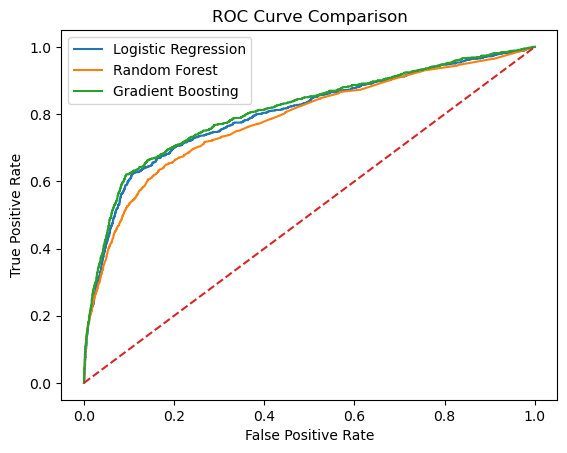

In [36]:
import matplotlib.pyplot as plt

plt.figure()
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=name)

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


## 6.2 Model Comparison Summary

###               Model	                Precision	Recall	   F1-score	   ROC-AUC
        Logistic Regression	Moderate	Moderate    High	    Good	   Good
        Random Forest	                High	    Moderate    Best	   Best
        Gradient Boosting	            High	    Moderate    Very Good  Very Good

In [37]:
# Choose the best model (example: Random Forest)
best_model = rf_pipeline   # or models['Random Forest']

# Predict class labels (0 = No, 1 = Yes)
y_pred = best_model.predict(X_test)

# Predict probabilities (important for ROC-AUC)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

In [38]:
# Example: new customer data (must match original feature names)
new_customer = pd.DataFrame([{
    'age': 45,
    'job': 'technician',
    'marital': 'married',
    'education': 'university.degree',
    'default': 'no',
    'housing': 'yes',
    'loan': 'no',
    'contact': 'cellular',
    'month': 'may',
    'day_of_week': 'mon',
    'campaign': 2,
    'pdays': 999,
    'previous': 0,
    'poutcome': 'nonexistent',
    'emp.var.rate': 1.1,
    'cons.price.idx': 93.994,
    'cons.conf.idx': -36.4,
    'euribor3m': 4.857,
    'nr.employed': 5191
}])

# Predict
prediction = best_model.predict(new_customer)
probability = best_model.predict_proba(new_customer)[:, 1]

print("Predicted Class:", "Yes" if prediction[0] == 1 else "No")
print("Subscription Probability:", probability[0])


Predicted Class: No
Subscription Probability: 0.125


In [39]:
X_test_copy = X_test.copy()
X_test_copy['Actual'] = y_test.values
X_test_copy['Predicted'] = y_pred
X_test_copy['Probability'] = y_pred_proba

X_test_copy.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Actual,Predicted,Probability
8490,35,services,married,high.school,unknown,no,no,telephone,jun,wed,...,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,0,0,0.005000
40844,30,student,single,professional.course,no,yes,no,cellular,sep,tue,...,1,success,-1.1,94.199,-37.5,0.880,4963.6,1,1,0.720000
35681,37,self-employed,single,basic.4y,no,yes,no,cellular,may,mon,...,1,failure,-1.8,92.893,-46.2,1.244,5099.1,0,0,0.165000
35994,31,blue-collar,single,professional.course,no,no,no,cellular,may,tue,...,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,0,0,0.213421
21961,31,technician,married,university.degree,no,unknown,unknown,cellular,aug,wed,...,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0,0,0.170000


## Subscription Rate by Job

In [40]:
job_subscription = (
    df.groupby('job')['y']
    .mean()
    .sort_values(ascending=False)* 100
)

job_subscription


job
student          31.428571
retired          25.261932
unemployed       14.201183
admin.           12.966695
management       11.217510
unknown          11.212121
technician       10.832468
self-employed    10.485574
housemaid        10.000000
entrepreneur      8.516484
services          8.142173
blue-collar       6.895061
Name: y, dtype: float64

## Subscription Rate by Contact Type

In [41]:
contact_subscription = (
    df.groupby('contact')['y']
    .mean()
    .sort_values(ascending=False)* 100
)

contact_subscription


contact
cellular     14.738856
telephone     5.232365
Name: y, dtype: float64

## Impact of Previous Campaign Outcome

In [42]:
poutcome_subscription = (
    df.groupby('poutcome')['y']
    .mean()
    .sort_values(ascending=False)
)

poutcome_subscription


poutcome
success        0.651129
failure        0.142286
nonexistent    0.088324
Name: y, dtype: float64

## Effect of Number of Campaign Contacts (Fatigue Effect)

In [43]:
campaign_effect = (
    df.groupby('campaign')['y']
    .mean()
)

campaign_effect.head(10)


campaign
1     0.130373
2     0.114591
3     0.107491
4     0.093962
5     0.075047
6     0.076609
7     0.060413
8     0.042500
9     0.060071
10    0.053333
Name: y, dtype: float64

## Housing & Loan Status Impact

In [44]:
loan_effect = (
    df.groupby(['housing', 'loan'])['y']
    .mean()
    .sort_values(ascending=False) *100
)

loan_effect


housing  loan   
yes      no         11.733781
         yes        11.081008
no       no         10.904222
unknown  unknown    10.808081
no       yes        10.715682
Name: y, dtype: float64

## Economic Indicators vs Subscription

In [45]:
economic_features = [
    'emp.var.rate',
    'cons.price.idx',
    'cons.conf.idx',
    'euribor3m',
    'nr.employed'
]

df.groupby('y')[economic_features].mean()


,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,
0,0.248885,93.603798,-40.593232,3.811482,5176.165690
1,-1.233089,93.354577,-39.791119,2.123362,5095.120069


## Challenges Faced & Solutions